**A prediction model for predicting Price of the Cars**

ToyotaCorolla.csv dataset

In [ ]:
#Importing dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Read the data
cars = pd.read_csv("ToyotaCorolla.csv",engine='python')
cars.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0


In [ ]:
cars.shape

(1436, 38)

There are 1436 records and 37 features (excluding Price column) to predict the Price.

Among these we select the following 9 features for our model.



 Price  -- Offer Price in EUROs

Age_08_04 -- Age in months as in August 2004	

KM -- Accumulated Kilometers on odometer

HP -- Horse Power

cc -- Cylinder Volume in cubic centimeters

Doors -- Number of doors

Gears -- Number of gear positions

Quarterly_Tax -- Quarterly road tax in EUROs

Weight -- Weight in Kilograms

In [ ]:
toyota=cars.loc[:,['Price',"Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax",'Weight']]
toyota.head(2)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165


In [ ]:
toyota.shape

(1436, 9)

In [ ]:
toyota.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')

In [ ]:
last_col=toyota.pop('Price')
last_col

0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1431     7500
1432    10845
1433     8500
1434     7250
1435     6950
Name: Price, Length: 1436, dtype: int64

In [ ]:
toyota.insert(8,'Price',last_col)
toyota.head()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750


In [ ]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Age_08_04      1436 non-null   int64
 1   KM             1436 non-null   int64
 2   HP             1436 non-null   int64
 3   cc             1436 non-null   int64
 4   Doors          1436 non-null   int64
 5   Gears          1436 non-null   int64
 6   Quarterly_Tax  1436 non-null   int64
 7   Weight         1436 non-null   int64
 8   Price          1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [ ]:
toyota.describe()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
count,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000
mean,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961,10730.824513
std,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112,3626.964585
min,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000,4350.000000
25%,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000,8450.000000
50%,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000,9900.000000
75%,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000,11950.000000
max,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000,32500.000000


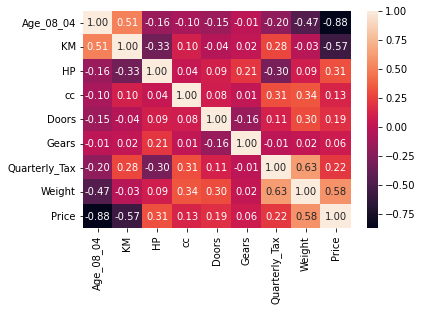

In [ ]:
sns.heatmap(toyota.corr(),annot=True,fmt='.2f')

Scatterplot between variables along with histograms

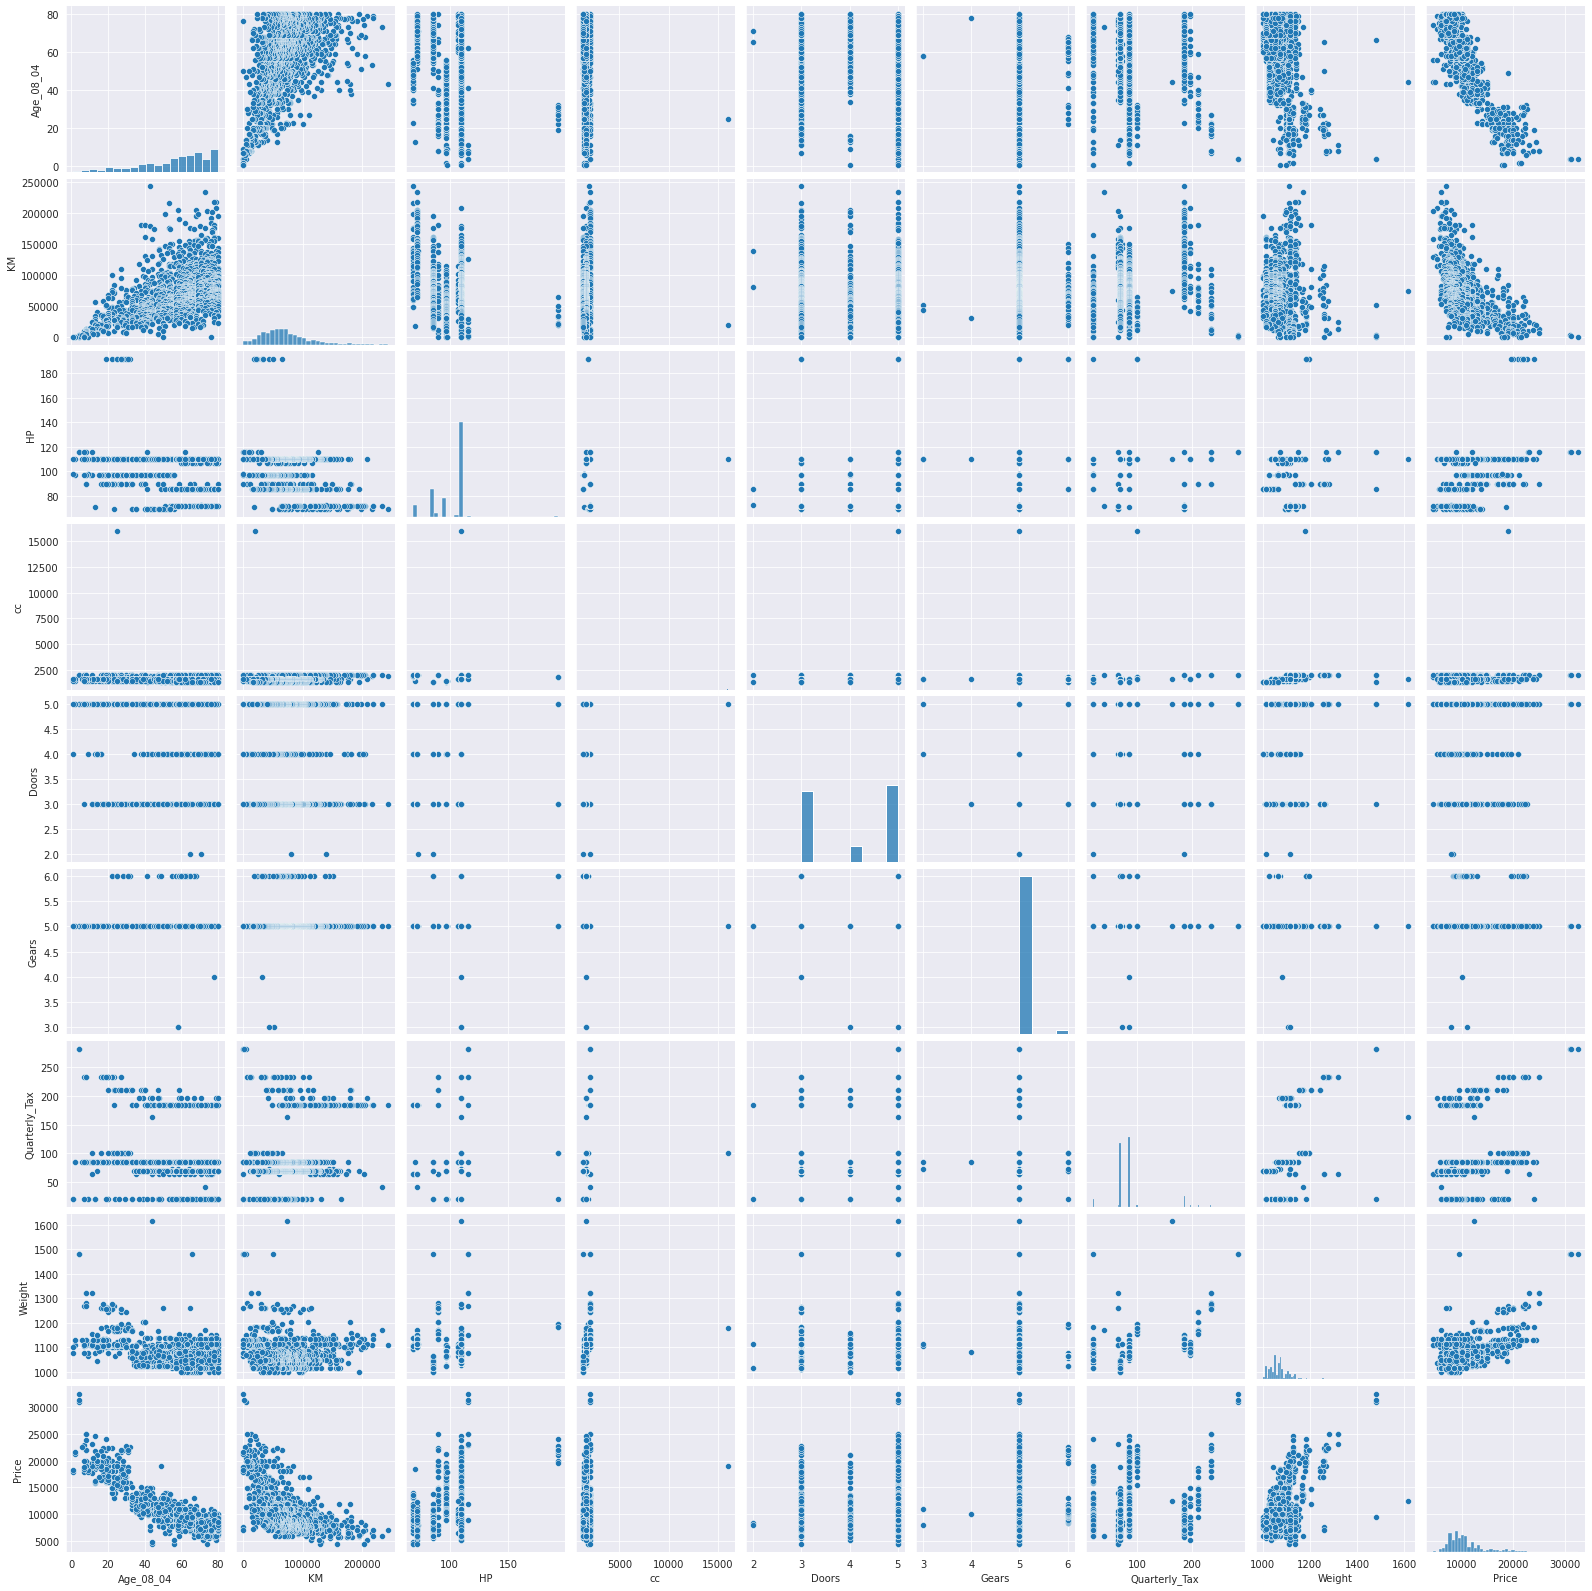

In [ ]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(toyota)

In [ ]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota).fit()

In [ ]:
model.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Sat, 09 Oct 2021   Prob (F-statistic):               0.00
Time:                        16:09:50   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept        -3.948666
Age_08_04       -46.511852
KM              -16.621622
HP               11.241018
cc               -1.344222
Doors            -0.040410
Gears             3.016007
Quarterly_Tax     3.014535
Weight           15.879803
dtype: float64 
 Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64


In [ ]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X = dmatrices('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', toyota, return_type='dataframe')

In [ ]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif.round(2)

,VIF Factor,features
0,1587.22,Intercept
1,1.88,Age_08_04
2,1.76,KM
3,1.42,HP
4,1.16,cc
5,1.16,Doors
6,1.10,Gears
7,2.31,Quarterly_Tax
8,2.52,Weight


Doors and cc have same vif which means they are multicollinear to each other. Hence, we would need to discard one of these variables. Let us remove Door variable as it showed the highest p-value

In [ ]:
ml_v=smf.ols('Price~cc',data = toyota).fit()  
print(ml_v.tvalues, '\n', ml_v.pvalues) 

Intercept    24.694090
cc            4.824822
dtype: float64 
 Intercept    1.766912e-112
cc            1.550808e-06
dtype: float64


In [ ]:
ml_d=smf.ols('Price~Doors',data = toyota).fit()  
print(ml_v.tvalues, '\n', ml_v.pvalues) 

Intercept    24.694090
cc            4.824822
dtype: float64 
 Intercept    1.766912e-112
cc            1.550808e-06
dtype: float64


In [ ]:
ml_ccd=smf.ols('Price~cc+Doors',data = toyota).fit()  
print(ml_v.tvalues, '\n', ml_v.pvalues)

Intercept    24.694090
cc            4.824822
dtype: float64 
 Intercept    1.766912e-112
cc            1.550808e-06
dtype: float64


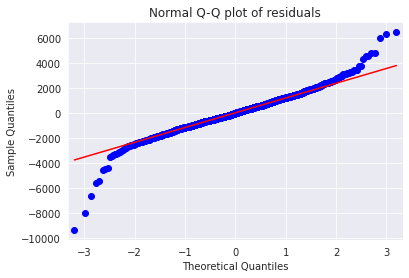

In [ ]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

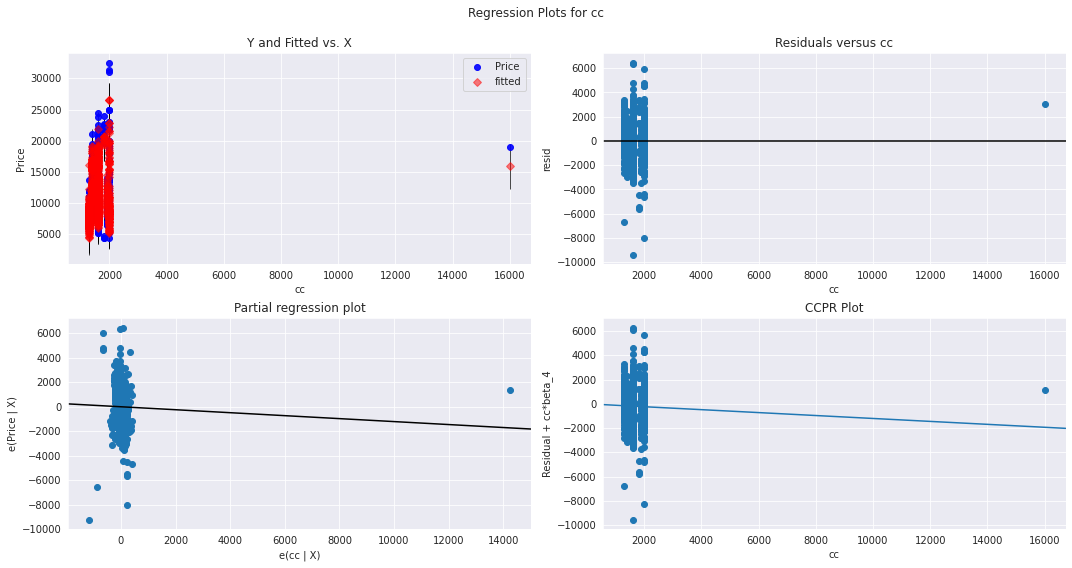

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "cc", fig=fig)
plt.show()

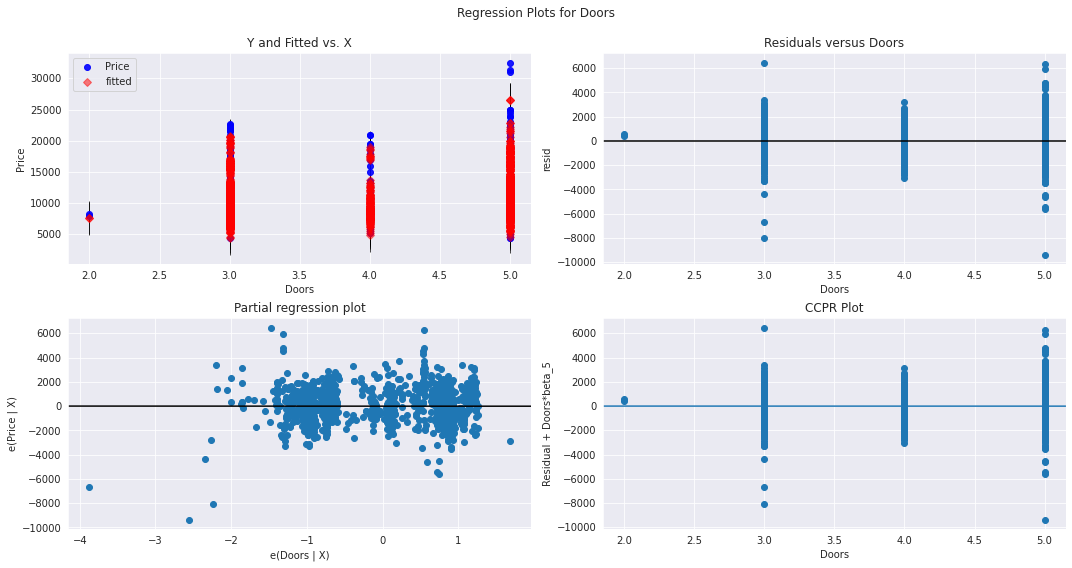

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

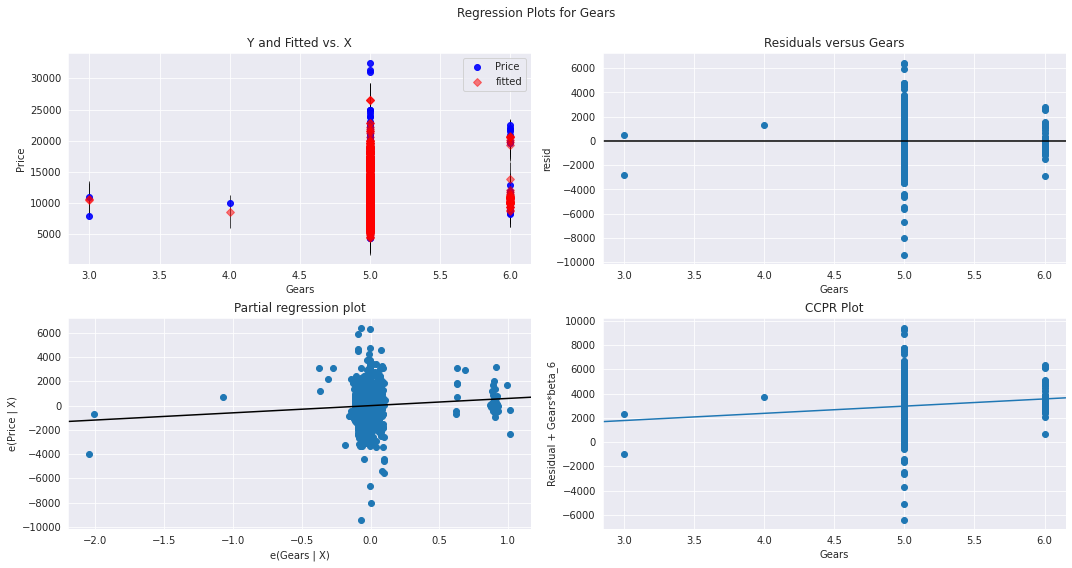

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

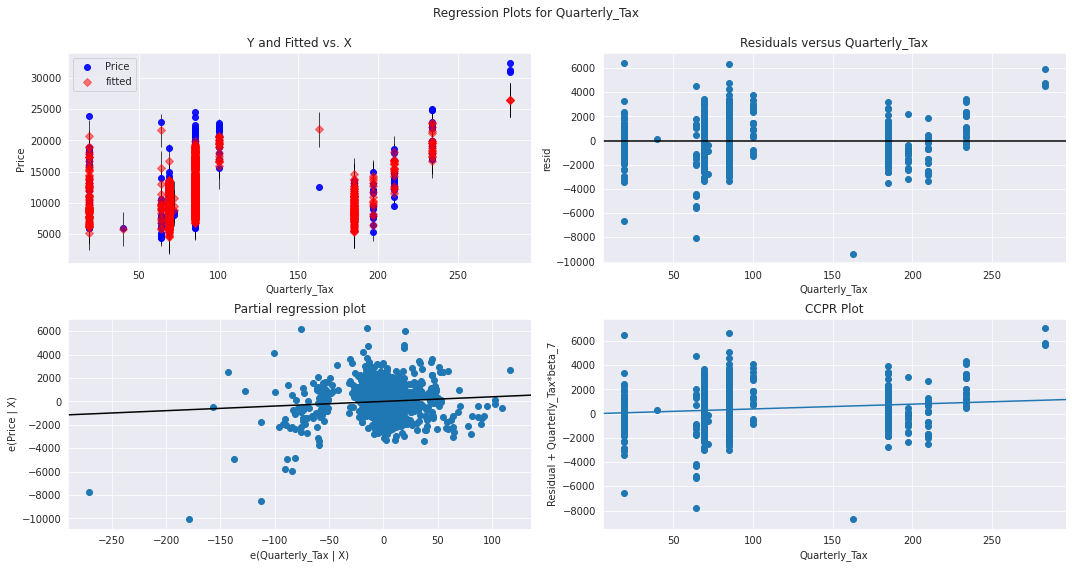

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Quarterly_Tax", fig=fig)
plt.show()

In [ ]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


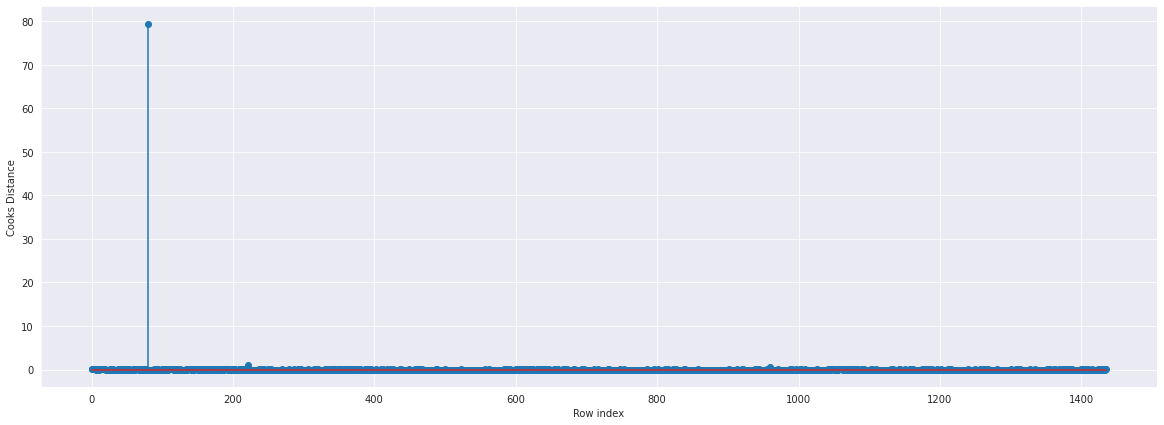

In [ ]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(cars)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(80, 79.52010624142554)

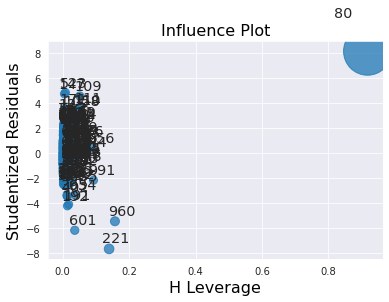

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [ ]:
toyota[toyota.index.isin([80])]

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
80,25,20019,110,16000,5,5,100,1180,18950


In [ ]:
toyota=toyota.drop(toyota.index[[80]],axis=0).reset_index()


In [ ]:
toyota.head()

,index,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,0,23,46986,90,2000,3,5,210,1165,13500
1,1,23,72937,90,2000,3,5,210,1165,13750
2,2,24,41711,90,2000,3,5,210,1165,13950
3,3,26,48000,90,2000,3,5,210,1165,14950
4,4,30,38500,90,2000,3,5,210,1170,13750
